In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
from mpl_toolkits.mplot3d import Axes3D
import os
from matplotlib.colors import LinearSegmentedColormap
import future.utils
import json
import numpy as np
import tqdm
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
sns.set_style("whitegrid")
import json
import os
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm


In [2]:
print('matplotlib: {}'. format(mpl.__version__))

matplotlib: 3.3.2


In [3]:
mpl.rcParams['agg.path.chunksize'] = 10000000

In [4]:
finalfile = "algorithmicBiasMediaModelMetrics2.csv"

In [5]:
results = pd.read_csv(f"aggregate/{finalfile}", index_col=[0])

In [6]:
results = results[results['gam'] != 0.25]
results

,n,p,eps,gam,gam_media,p_media,max_it,media_op,avg_ncluster_0.01,std_ncluster_0.01,...,Q3_niter,avg_pwdist,std_pwdist,med_pwdist,Q1_pwdist,Q3_pwdist,iqm_pwdist,std_iqm_pwdist,iqm_niter,std_iqm_niter
0,100,1.0,0.2,0.00,0.00,0.0,1000000,0.05;0.5;0.95,2.142106,0.348185,...,46.5,0.240257,0.241035,0.29670,0.0000,0.4683,0.141211,0.190860,35.420000,4.064923
1,100,1.0,0.2,0.50,0.50,0.0,1000000,0.05;0.5;0.95,4.467653,2.214858,...,43.0,0.267735,0.236927,0.28850,0.0026,0.4590,0.244232,0.149788,30.872727,5.954539
2,100,1.0,0.2,0.75,0.75,0.0,1000000,0.05;0.5;0.95,4.440457,2.114218,...,31.0,0.263975,0.235819,0.27220,0.0029,0.4603,0.235807,0.149161,26.730769,2.646590
3,100,1.0,0.2,1.00,1.00,0.0,1000000,0.05;0.5;0.95,3.974855,1.673121,...,36.5,0.264782,0.241446,0.26926,0.0030,0.4693,0.231505,0.152610,27.735849,3.115094
4,100,1.0,0.2,1.25,1.25,0.0,1000000,0.05;0.5;0.95,4.187479,1.626057,...,49.5,0.271423,0.237884,0.27800,0.0047,0.4668,0.246906,0.147068,35.460000,5.872683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,100,1.0,0.5,0.50,0.50,0.5,1000000,0.5,1.000000,0.000000,...,14.0,0.000398,0.000382,0.00050,0.0000,0.0005,0.000248,0.000222,12.836364,0.803710
572,100,1.0,0.5,0.75,0.75,0.5,1000000,0.5,1.000000,0.000000,...,14.0,0.000425,0.000405,0.00050,0.0000,0.0005,0.000250,0.000226,12.944444,0.761739
573,100,1.0,0.5,1.00,1.00,0.5,1000000,0.5,1.000000,0.000000,...,15.0,0.000404,0.000389,0.00050,0.0000,0.0005,0.000249,0.000220,14.050633,0.777838
574,100,1.0,0.5,1.25,1.25,0.5,1000000,0.5,1.000000,0.000000,...,15.0,0.000462,0.000429,0.00050,0.0000,0.0007,0.000263,0.000225,14.584615,0.492788


In [7]:
gams = list(results.gam.unique())
p_medias = list(results.p_media.unique())
epss = list(results.eps.unique())
mos = list(results.media_op.unique())
print(gams, p_medias, epss, mos)

[0.0, 0.5, 0.75, 1.0, 1.25, 1.5] [0.0, 0.1, 0.2, 0.3, 0.4, 0.5] [0.2, 0.3, 0.4, 0.5] ['0.05;0.5;0.95', '0.05;0.95', '0.0', '0.5']


In [8]:
balanced = results[results['media_op'] == '0.05;0.5;0.95']
print(len(balanced))
gams = list(balanced.gam.unique())
p_medias = list(balanced.p_media.unique())
epss = list(balanced.eps.unique())
mos = list(balanced.media_op.unique())
print(gams, p_medias, epss, mos)

144
[0.0, 0.5, 0.75, 1.0, 1.25, 1.5] [0.0, 0.1, 0.2, 0.3, 0.4, 0.5] [0.2, 0.3, 0.4, 0.5] ['0.05;0.5;0.95']


In [9]:
polarised = results[results['media_op'] == '0.05;0.95']
print(len(polarised))
gams = list(polarised.gam.unique())
p_medias = list(polarised.p_media.unique())
epss = list(polarised.eps.unique())
mos = list(polarised.media_op.unique())
print(gams, p_medias, epss, mos)

144
[0.0, 0.5, 0.75, 1.0, 1.25, 1.5] [0.0, 0.1, 0.2, 0.3, 0.4, 0.5] [0.2, 0.3, 0.4, 0.5] ['0.05;0.95']


In [10]:
extremist = results[results['media_op'] == '0.0']
print(len(extremist))
gams = list(extremist.gam.unique())
p_medias = list(extremist.p_media.unique())
epss = list(extremist.eps.unique())
mos = list(extremist.media_op.unique())
print(gams, p_medias, epss, mos)

144
[0.0, 0.5, 0.75, 1.0, 1.25, 1.5] [0.0, 0.1, 0.2, 0.3, 0.4, 0.5] [0.2, 0.3, 0.4, 0.5] ['0.0']


In [11]:
moderate = results[results['media_op'] == '0.5']
print(len(moderate))
gams = list(moderate.gam.unique())
p_medias = list(moderate.p_media.unique())
epss = list(moderate.eps.unique())
mos = list(moderate.media_op.unique())
print(gams, p_medias, epss, mos)

144
[0.0, 0.5, 0.75, 1.0, 1.25, 1.5] [0.0, 0.1, 0.2, 0.3, 0.4, 0.5] [0.2, 0.3, 0.4, 0.5] ['0.5']


In [12]:
deffuant = results[results['gam']==0.0]

In [13]:
def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]

def get_continuous_cmap(hex_list, float_list=None):
    ''' creates and returns a color map that can be used in heat map figures.
        If float_list is not provided, colour map graduates linearly between each color in hex_list.
        If float_list is provided, each color in hex_list is mapped to the respective location in float_list. 
        
        Parameters
        ----------
        hex_list: list of hex code strings
        float_list: list of floats between 0 and 1, same length as hex_list. Must start with 0 and end with 1.
        
        Returns
        ----------
        colour map'''
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp

heatmap_hex_list = ['#357db0', '#ce2626']
heatmap_cmap=get_continuous_cmap(heatmap_hex_list)

spaghetti_hex_list = ['#357db0', '#18A558', '#ce2626']
spaghetti_cmap=get_continuous_cmap(spaghetti_hex_list)



In [14]:
def from_res_to_iterations(name, nr):
    res = open("{}.csv".format(name))
    iterations = []
    it = 0
    for line in res.readlines():
        iterations.append(dict())
        iterations[it]['iteration'] = it
        iterations[it]['status'] = dict()

        opinions = line.strip().split(',')

        for i in range(len(opinions)):
            iterations[it]['status'][i] = float(opinions[i])
            iterations[it]['node_count'] = {0: 0},
            iterations[it]['status_delta'] = {0: 0}

        it += 1
        
    return iterations

def evolution(iterations, hex_list, fig, ax):

    spaghetti_hex_list = ['#357db0', '#18A558', '#ce2626']


    """
    Generates the plot

    :param filename: Output filename
    :param percentile: The percentile for the trend variance area
    """

    nodes2opinions = {}
    node2col = {}

    last_it = iterations[-1]['iteration'] + 1
    last_seen = {}

    for it in iterations:
        sts = it['status']
        its = it['iteration']
        for n, v in sts.items():
            if n in nodes2opinions:
                last_id = last_seen[n]
                last_value = nodes2opinions[n][last_id]

                for i in range(last_id, its):
                    nodes2opinions[n][i] = last_value

                nodes2opinions[n][its] = v
                last_seen[n] = its
            else:
                nodes2opinions[n] = [0]*last_it
                nodes2opinions[n][its] = v
                last_seen[n] = 0
                if v < 0.33:
                    node2col[n] = spaghetti_hex_list[0]
                elif 0.33 <= v <= 0.66:
                    node2col[n] = spaghetti_hex_list[1]
                else:
                    node2col[n] = spaghetti_hex_list[2]

    mx = 0
    for k, l in future.utils.iteritems(nodes2opinions):
        if mx < last_seen[k]:
            mx = last_seen[k]
        x = list(range(0, last_seen[k]))
        y = l[0:last_seen[k]]
        ax.plot(x, y, lw=1.5, alpha=0.5, color=node2col[k])
    
    # ax.set_ylim(-0.1, 1.1)
    # ax.set_xlim(0, 1000)
    # ax.tick_params(axis='both', which='major', labelsize=4, pad=0) 
    # ax.set_xlabel("o", fontsize=5)
    # ax.set_ylabel("t", fontsize=5)               
    # plt.grid(axis = 'both', which='both')
    plt.tight_layout()

In [15]:
settings = ['extremist', 'moderate', 'polarised', 'balanced']
for setting in settings:
    if not os.path.exists(f"scirep/"):
        os.mkdir("scirep/")
    if not os.path.exists(f"scirep/plots/"):
        os.mkdir("scirep/plots/")
    if not os.path.exists(f"scirep/plots/{setting}"):
        os.mkdir(f"scirep/plots/{setting}/")

In [ ]:
n = 100
graph = nx.complete_graph(n)
max_it = 1000000
i = 0
for mo in [[0.0], [0.5], [0.05, 0.95], [0.05, 0.5, 0.95]]:
    for pm in [0.0, 0.1, 0.5]:
        for e in [0.2, 0.3, 0.4, 0.5]:
            for g in [0.0, 0.5, 1.0, 1.5]:
                if not os.path.exists(f"scirep/plots/{settings[i]}/spaghetti_{settings[i]}_pm{pm}_e{e}_g{g}.png"):
                    print("doing")
                    print((f"scirep/plots/{settings[i]}/spaghetti_{settings[i]}_pm{pm}_e{e}_g{g}.png"))
                    sns.set_style("white")
                    model = op.AlgorithmicBiasMediaModel(graph)
                    config = mc.Configuration()
                    config.add_model_parameter("epsilon", e)
                    config.add_model_parameter("gamma", g)
                    config.add_model_parameter("gamma_media", g)
                    config.add_model_parameter("k", len(mo))
                    config.add_model_parameter("p", pm)
                    model.set_initial_status(config)
                    model.set_media_opinions(mo)
                    # # Simulation execution
                    iterations = model.steady_state(max_iterations=max_it, nsteady=1000, sensibility=0.00001, node_status=True, progress_bar=True, drop_evolution=False)
                    fig, ax = plt.subplots(figsize=(7, 5), dpi=600)
                    evolution(iterations, spaghetti_hex_list, fig=fig, ax=ax)
                    #plt.savefig(f"scirep/plots/{settings[i]}/spaghetti_{settings[i]}_pm{pm}_e{e}_g{g}.png", bbox_inches="tight")
                    plt.close()
                else:
                    continue
                    print(f"esiste già")
                    print(f"scirep/plots/{settings[i]}/spaghetti_{settings[i]}_pm{pm}_e{e}_g{g}.png")
    i+=1

In [16]:
results.columns

Index(['n', 'p', 'eps', 'gam', 'gam_media', 'p_media', 'max_it', 'media_op',
       'avg_ncluster_0.01', 'std_ncluster_0.01', 'med_ncluster_0.01',
       'Q1_ncluster_0.01', 'Q3_ncluster_0.01', 'iqm_ncluster',
       'std_iqm_ncluster', 'avg_avg_opinion', 'std_avg_opinion',
       'med_avg_opinion', 'Q1_avg_opinion', 'Q3_avg_opinion',
       'avg_median_opinion', 'std_median_opinion', 'med_median_opinion',
       'Q1_median_opinion', 'Q3_median_opinion', 'avg_std_opinions',
       'std_std_opinions', 'med_std_opinions', 'Q1_std_opinions',
       'Q3_std_opinions', 'avg_095_perc', 'std_095_perc', 'med_095_perc',
       'Q1_095_perc', 'Q3_095_perc', 'avg_00_perc', 'std_00_perc',
       'med_00_perc', 'Q1_00_perc', 'Q3_00_perc', 'avg_05_perc', 'std_05_perc',
       'med_05_perc', 'Q1_05_perc', 'Q3_05_perc', 'avg_005_perc',
       'std_005_perc', 'med_005_perc', 'Q1_005_perc', 'Q3_005_perc',
       'avg_100B_norm_entr', 'std_100B_norm_entr', 'med_100B_norm_entr',
       'Q1_100B_norm_entr'

In [17]:
averages = [a for a in list(results.columns) if a.startswith('avg') or a.startswith('iqm')]
medians = [m for m in  list(results.columns) if m.startswith('med')]
Q1s = [q for q in  list(results.columns) if q.startswith('Q1')]
Q3s = [q for q in  list(results.columns) if q.startswith('Q3')]
titles = ['pairwise distance', '# clusters', '# clusters', '# iterations', 'average opinion', 'std opinions', 'median opinion', '% extremist (0.0)', '% moderates (0.5)', '% extremists (0.05)', '% extremists (0.95)', 'normalized entropy', 'normalized entropy']
# stdmeasures = ['std_'+measure for measure in measures]
# stdmeasures

# Heatmaps

In [97]:
plt.rcParams['font.family']='serif'
plt.rcParams['font.size'] = 15
plt.rcParams['xtick.major.pad']='-2'
plt.rcParams['ytick.major.pad']='-1'
width = 3
heigth = 3
annot_size=10

In [100]:
# for setting in settings:
#     if not os.path.exists(f'scirep/plots/{setting}/'):
#             os.mkdir(f'scirep/plots/{setting}')
          

# setting = 'balanced'
# df = balanced

# for measure in averages:
#     if not os.path.exists(f'scirep/plots/{setting}/{measure}'):
#             os.mkdir(f'scirep/plots/{setting}/{measure}/')
# for measure in medians:
#     if not os.path.exists(f'scirep/plots/{setting}/{measure}'):
#             os.mkdir(f'scirep/plots/{setting}/{measure}')
           
# for measure in averages:
#     for eps in sorted(df.eps.unique()):
#         fig, ax = plt.subplots(figsize=(width, heigth), dpi=300)
#         x = "p_media"
#         y = "gam"
#         data = df[df["eps"]==eps]
#         d = data.pivot(x, y, measure)
#         if max(df[measure]) > 100:
#             a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".0f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={'fontsize': annot_size}, linewidth=0.1, linecolor='w')
#         elif max(df[measure]) > 10:
#             a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".1f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={'fontsize': annot_size}, linewidth=0.1, linecolor='w')
#         else:
#             a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".2f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={'fontsize': annot_size}, linewidth=0.1, linecolor='w')
#         ax.set_xlabel(r'$\gamma$', fontsize = 20)
#         ax.set_ylabel(r'$p_m$', fontsize = 20)
#         ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
#         ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)
#         #plt.show()
#         plt.savefig(f"scirep/plots/{setting}/{measure}/{setting}_{measure}_e{eps}_heatmap.png", bbox_inches="tight")
#         plt.close()
# print('done')     

# #polarised setting
# setting = 'polarised'
# df = polarised

# for measure in averages:
#     if not os.path.exists(f'scirep/plots/{setting}/{measure}'):
#             os.mkdir(f'scirep/plots/{setting}/{measure}')
# for measure in medians:
#     if not os.path.exists(f'scirep/plots/{setting}/{measure}'):
#             os.mkdir(f'scirep/plots/{setting}/{measure}')
            
# for measure in averages:
#     for eps in sorted(df.eps.unique()):
#         fig, ax = plt.subplots(figsize=(width, heigth), dpi=300)
#         x = "p_media"
#         y = "gam"
#         data = df[df["eps"]==eps]
#         d = data.pivot(x, y, measure)
#         if max(df[measure]) > 100:
#             a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".0f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={'fontsize': annot_size}, linewidth=0.1, linecolor='w')
#         elif max(df[measure]) > 10:
#             a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".1f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={'fontsize': annot_size}, linewidth=0.1, linecolor='w')
#         else:
#             a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".2f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={'fontsize': annot_size}, linewidth=0.1, linecolor='w')
#         ax.set_xlabel(r'$\gamma$', fontsize = 20)
#         ax.set_ylabel(r'$p_m$', fontsize = 20)
#         ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
#         ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)
#         #plt.show()
#         plt.savefig(f"scirep/plots/{setting}/{measure}/{setting}_{measure}_e{eps}_heatmap.png", bbox_inches="tight")
#         plt.close()
# print('done')     

# setting = 'extremist'
# df = extremist

# for measure in averages:
#     if not os.path.exists(f'scirep/plots/{setting}/{measure}'):
#             os.mkdir(f'scirep/plots/{setting}/{measure}')
# for measure in medians:
#     if not os.path.exists(f'scirep/plots/{setting}/{measure}'):
#             os.mkdir(f'scirep/plots/{setting}/{measure}')
            
# for measure in averages:
#     for eps in sorted(df.eps.unique()):
#         fig, ax = plt.subplots(figsize=(width, heigth), dpi=300)
#         x = "p_media"
#         y = "gam"
#         data = df[df["eps"]==eps]
#         d = data.pivot(x, y, measure)
#         if max(df[measure]) > 100:
#             a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".0f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={'fontsize': annot_size}, linewidth=0.1, linecolor='w')
#         elif max(df[measure]) > 10:
#             a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".1f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={'fontsize': annot_size}, linewidth=0.1, linecolor='w')
#         else:
#             a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".2f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={'fontsize': annot_size}, linewidth=0.1, linecolor='w')
#         ax.set_xlabel(r'$\gamma$', fontsize = 20)
#         ax.set_ylabel(r'$p_m$', fontsize = 20)
#         ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
#         ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)
#         #plt.show()
#         plt.savefig(f"scirep/plots/{setting}/{measure}/{setting}_{measure}_e{eps}_heatmap.png", bbox_inches="tight")
#         plt.close()
# print('done')     

setting = 'moderate'
df = moderate

for measure in averages:
    if not os.path.exists(f'scirep/plots/{setting}/{measure}'):
            os.mkdir(f'scirep/plots/{setting}/{measure}')
for measure in medians:
    if not os.path.exists(f'scirep/plots/{setting}/{measure}'):
            os.mkdir(f'scirep/plots/{setting}/{measure}')

for measure in averages:
    for eps in sorted(df.eps.unique()):
        fig, ax = plt.subplots(figsize=(width, heigth), dpi=300)
        x = "p_media"
        y = "gam"
        data = df[df["eps"]==eps]
        d = data.pivot(x, y, measure)
        if max(df[measure]) > 100:
            a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".0f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={'fontsize': annot_size}, linewidth=0.1, linecolor='w')
        elif max(df[measure]) > 10:
            a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".1f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={'fontsize': annot_size}, linewidth=0.1, linecolor='w')
        else:
            a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".2f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={'fontsize': annot_size}, linewidth=0.1, linecolor='w')
        ax.set_xlabel(r'$\gamma$', fontsize = 20)
        ax.set_ylabel(r'$p_m$', fontsize = 20)
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
        ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)
        #plt.show()
        plt.savefig(f"scirep/plots/{setting}/{measure}/{setting}_{measure}_e{eps}_heatmap.png", bbox_inches="tight")
        plt.close()
print('done')     


done


In [ ]:
### problema da risolvere: error bar asimmetriche
### allora invece di fare media e sd potrei fare dei mini boxplottini però devo andà a riacchiappà i file originali 

from matplotlib.ticker import FormatStrFormatter

markers = ['s', 'o', 'v', '^', '<', '>']
colors = ['tab:red', 'tab:blue', 'tab:green', 'yellow', 'purple', 'orange']
sns.set(font_scale=2.5)
sns.set_style("whitegrid")
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 4
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 4
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['font.family']='serif'
plt.rcParams['font.size'] = 16

m = 0
for measure in medians:
    i=0
    for eps in sorted(df.eps.unique()):
        fig, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=1, dpi=600)
        x = "gam"
        y = "p_media"
        data = df[df["eps"]==eps]
        j = 0
        for pm in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]:
            data1 = data[data['p_media'] == pm]
            ax.errorbar(x = data1['gam'], y=data1[measure])
            j+=1
        j=0
        for pm in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]:
            data1 = data[data['p_media'] == pm]
#             ax.scatter(x = data1['gam'], y=data1[measure], marker = [], c=colors[j], label=pm)
            j +=1 
        ax.set_xlabel(r'$\gamma$', fontsize=30, labelpad=10)
#         ax.set_ylabel(f'{titles[m]}', fontsize=30, labelpad=10)
        ax.set_xticks([0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5])
        ax.tick_params(axis='x', which='both', labelrotation=45)
        ax.tick_params(axis='y', which='both', pad=5)
        ax.legend(loc='best', title=r'$p_m$', prop={'size': 10})
#         ax.set_ylim(bottom=min(df[measure])-max(df[errs[m]])-0.05, top = max(df[measure])+max(df[errs[m]])+0.05)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#     #plt.savefig(f"plots/{setting}/{measure}/{setting}_{measure}_e{eps}_2D.png", bbox_inches="tight")
    #plt.show()
    plt.close()
    m+=1

In [101]:
from scipy import stats

def nclusters(data, threshold):
    data = [float(el) for el in data]
    data = sorted(data)
    start = data[0]
    max_val = start + threshold
    c = (start, max_val)
    cluster = dict()
    for i in data:
        if i <= max_val:
            if c in cluster.keys():
                cluster[c] += 1
            else:
                cluster[c] = 1
        else:
            max_val = i + threshold
            c = (i, max_val)
            cluster[c] = 1
    #ora ho il dizionario con i cluster di una run
    C_num = len(data)**2
    C_den = 0
    for k in cluster.keys():
        C_den += cluster[k]*cluster[k]
    C = C_num / C_den
    return C

def pwdist(opinions):
    pwdarray = np.zeros(shape=(100, 100))
    for i in range(100):
        o_i = opinions[i]
        for j in range(100):
            if j != i:
                o_j = opinions[j]
                d = abs(o_i-o_j)
                pwdarray[i, j] = d
    return pwdarray

def entropy(opinions, n, nbins):
    bincounts, bin_edges = np.histogram(opinions, bins = np.linspace(0, 1, nbins))
    probabilities = bincounts/n
    entr = stats.entropy(probabilities)
    return entr

def nodeperc_withininterval(opinions, center, width):
    sortedops = sorted(opinions)
    sortedopsarr = np.array(sortedops)
    withinrange = np.where(np.logical_and(sortedopsarr>=(center-width), sortedopsarr<=(center+width)))
    withinrange = withinrange[0]
    perc = len(withinrange) / len(sortedops)
    return perc

def average_opinions(opinions):
    a = np.array(opinions)
    return np.average(a)

def std_opinions(opinions):
    a = np.array(opinions)
    return np.std(a)

def median_opinions(opinions):
    a = np.array(opinions)
    return np.median(a)




In [102]:
max_entr_array = np.arange(0, 1, 0.01)
maxval = entropy(max_entr_array, 100, 101)

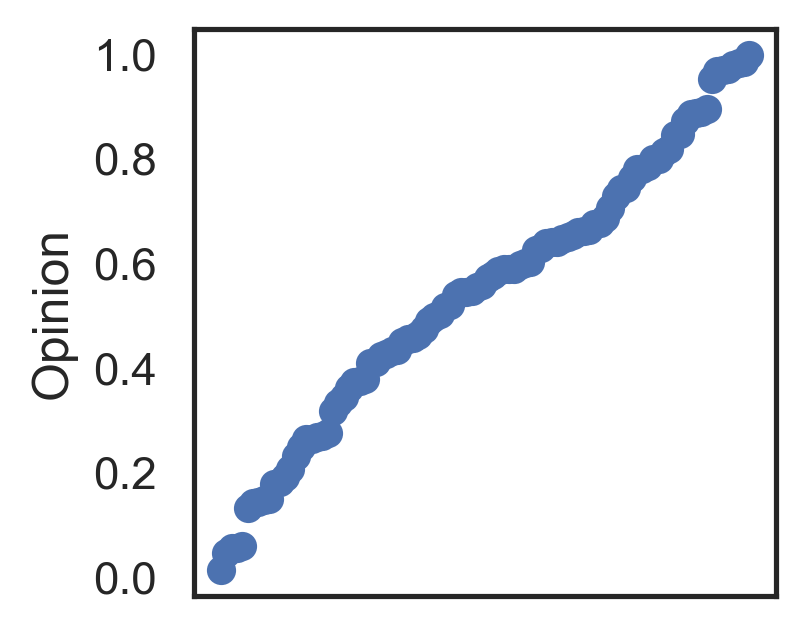

In [110]:
markers = ['s', 'o', 'v', '^', '<', '>']
colors = ['tab:red', 'tab:blue', 'tab:green', 'yellow', 'purple', 'orange']
sns.set(font_scale=1)
sns.set_style("whitegrid")
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 4
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['font.family']='serif'
plt.rcParams['font.size'] = 16

sns.set_style("white")
fig, ax = plt.subplots(figsize=(2.5, 2.5), dpi=300)
distr = np.random.uniform(0, 1, 100)
ax.scatter(x=[i for i in range(100)], y = sorted(distr))
ax.set_xticklabels("")
ax.set_ylabel("Opinion")
plt.show()
plt.close()